## Figure 10

Similar to [Figure 3](https://github.com/EdwardJKim/astroclass/blob/master/paper/notebooks/figure03/weights.ipynb)
but for the reduced training data set.

In [1]:
%matplotlib inline

In [3]:
from __future__ import print_function, division, unicode_literals
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

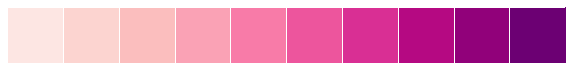

In [7]:
cmap = sns.choose_colorbrewer_palette('sequential', as_cmap=True)

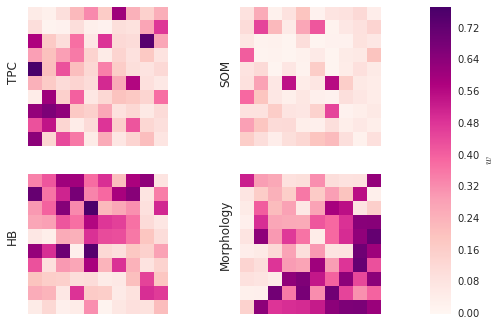

In [8]:
n_grid = 10

tpc_cells = np.zeros(n_grid**2)
som_cells = np.zeros(n_grid**2)
hbc_cells = np.zeros(n_grid**2)
morph_cells = np.zeros(n_grid**2)

for i in xrange(n_grid**2):
    
    weights = np.loadtxt('../../data/bmc_weights_cut/bmc_weights.' + str(i) + '.dat')

    w = np.sum(weights, axis = 0)
    w = w / w.sum()

    tpc_cells[i] = w[0]
    som_cells[i] = w[1]
    hbc_cells[i] = w[2]
    morph_cells[i] = w[3]

tpc_cells = tpc_cells.reshape((n_grid, n_grid))
som_cells = som_cells.reshape((n_grid, n_grid))
hbc_cells = hbc_cells.reshape((n_grid, n_grid))
morph_cells = morph_cells.reshape((n_grid, n_grid))

gs = gridspec.GridSpec(2, 3, height_ratios = (1, 1), width_ratios = (9, 9, 1))

vmax = np.max([tpc_cells, som_cells, hbc_cells, morph_cells])
rotation = 'vertical'

ax1 = plt.subplot(gs[0, 0])
im1 = ax1.matshow(tpc_cells, cmap=cmap, vmin=0, vmax=vmax)
ax1.set_title('TPC', rotation = rotation, x = -0.1, y = 0.5)
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = plt.subplot(gs[0, 1])
ax2.matshow(som_cells, cmap=cmap, vmin=0, vmax=vmax)
ax2.set_title('SOM', rotation = rotation, x = -0.1, y = 0.5)
ax2.set_xticks([])
ax2.set_yticks([])

ax3 = plt.subplot(gs[1, 0])
ax3.matshow(hbc_cells, cmap=cmap, vmin=0, vmax=vmax)
ax3.set_title('HB', rotation = rotation, x = -0.1, y = 0.5)
ax3.set_xticks([])
ax3.set_yticks([])

ax4 = plt.subplot(gs[1, 1])
ax4.matshow(morph_cells, cmap=cmap, vmin=0, vmax=vmax)
ax4.set_title('Morphology', rotation = rotation, x = -0.1, y = 0.7)
ax4.set_xticks([])
ax4.set_yticks([])

ax5 = plt.subplot(gs[0:, 2])
cb1 = plt.colorbar(im1, cax=ax5)
cb1.set_label(r'$w$')
cb1.set_clim([0, vmax])

plt.savefig('../../figures/weights_cut.pdf')

plt.show()